In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [25]:
true_news_path = '/content/True.csv'
true_news = pd.read_csv(true_news_path)
true_news['label'] = 'real'

# Display the first few rows of  dataset
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [26]:
fake_news_path = '/content/Fake.csv'
fake_news = pd.read_csv(fake_news_path)
fake_news['label'] = 'fake'
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [27]:
# Combine the DataFrames
news_data = pd.concat([true_news, fake_news])

# Shuffle the combined DataFrame to mix real and fake news
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the combined DataFrame
news_data.head()

,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",fake
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",fake
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",fake
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",real
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",fake


In [28]:
news_data.isnull()


,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


In [29]:
import nltk

# Download WordNet if not already downloaded
nltk.download('wordnet')

# import the NLTK resources as usual
from nltk.corpus import wordnet

# Example usage of WordNet
syns = wordnet.synsets("car")
print(syns)


[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text

# Tokenization, stop words removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# Apply text cleaning and preprocessing
news_data['clean_text'] = news_data['text'].apply(clean_text)
news_data['processed_text'] = news_data['clean_text'].apply(preprocess_text)

# Display the first few rows of the processed text
news_data[['text', 'clean_text', 'processed_text', 'label']].head()

,text,clean_text,processed_text,label
0,"Donald Trump s White House is in chaos, and th...",donald trump s white house is in chaos and the...,donald trump white house chaos trying cover ru...,fake
1,Now that Donald Trump is the presumptive GOP n...,now that donald trump is the presumptive gop n...,donald trump presumptive gop nominee time reme...,fake
2,Mike Pence is a huge homophobe. He supports ex...,mike pence is a huge homophobe he supports exg...,mike penny huge homophobe support exgay conver...,fake
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gen...,san francisco reuters california attorney gene...,real
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning is all that comes from pelos...,twisted reasoning come pelosi day especially p...,fake


label
fake    23481
real    21417
Name: count, dtype: int64


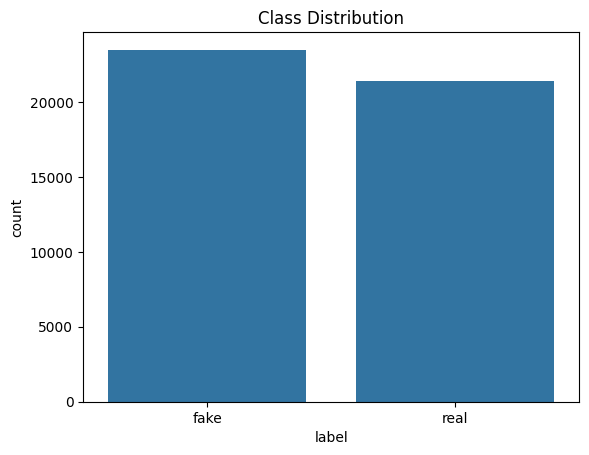

In [32]:
import seaborn as sns

class_counts = news_data['label'].value_counts()
print(class_counts)

# Plotting the class distribution
sns.countplot(x='label', data=news_data)
plt.title('Class Distribution')
plt.show()

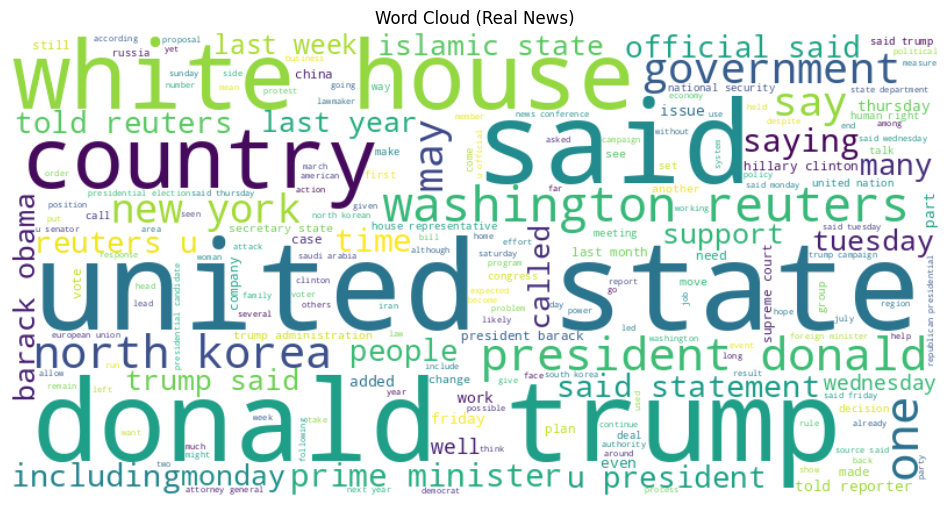

In [33]:
# Function to calculate and plot the frequency of words for each label
def plot_word_cloud(label, label_name):
    # Filter the data for the given label
    label_data = news_data[news_data['label'] == label]

    # Combine all processed text into one string
    all_text = ' '.join(label_data['processed_text'])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud ({label_name} News)')
    plt.show()

# Plot word clouds for each label
plot_word_cloud('real', 'Real')

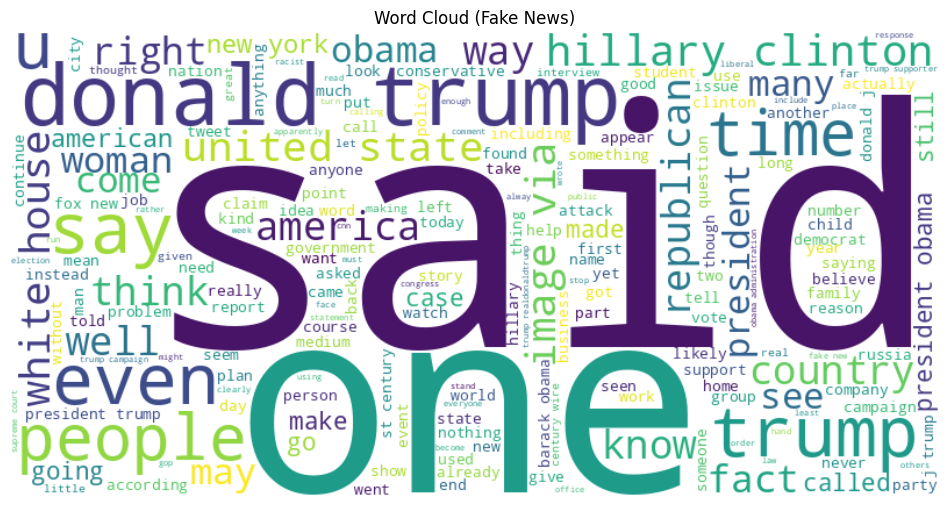

In [34]:
plot_word_cloud('fake', 'Fake')


In [35]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')  # For VADER sentiment analysis


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if text:  # Ensure there's valid text
        scores = sid.polarity_scores(text)  # Get sentiment scores
        return scores
    else:
        return {'pos': 0, 'neu': 0, 'neg': 0, 'compound': 0}  # Return default scores if text is empty

# Apply sentiment analysis
news_data['sentiment_scores'] = news_data['processed_text'].apply(get_sentiment_scores)

# Separate the sentiment scores into individual columns
sentiment_df = pd.json_normalize(news_data['sentiment_scores'])
news_data = pd.concat([news_data, sentiment_df], axis=1)

# Display the first few rows with sentiment scores
news_data[['text', 'clean_text','processed_text','label' ,'pos', 'neu', 'neg', 'compound']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,clean_text,processed_text,label,pos,neu,neg,compound
0,"Donald Trump s White House is in chaos, and th...",donald trump s white house is in chaos and the...,donald trump white house chaos trying cover ru...,fake,0.114,0.612,0.274,-0.9872
1,Now that Donald Trump is the presumptive GOP n...,now that donald trump is the presumptive gop n...,donald trump presumptive gop nominee time reme...,fake,0.157,0.686,0.158,-0.5224
2,Mike Pence is a huge homophobe. He supports ex...,mike pence is a huge homophobe he supports exg...,mike penny huge homophobe support exgay conver...,fake,0.133,0.737,0.130,0.1677
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gen...,san francisco reuters california attorney gene...,real,0.055,0.945,0.000,0.2960
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning is all that comes from pelos...,twisted reasoning come pelosi day especially p...,fake,0.198,0.718,0.084,0.8832


In [36]:
mean_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].mean()
std_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].std()

print("Mean sentiment scores:")
print(mean_scores)
print("\nStandard deviation of sentiment scores:")
print(std_scores)

Mean sentiment scores:
            pos       neu       neg  compound
label                                        
fake   0.143592  0.688442  0.141099 -0.043834
real   0.128809  0.756104  0.115037  0.098264

Standard deviation of sentiment scores:
            pos       neu       neg  compound
label                                        
fake   0.079453  0.147762  0.083784  0.837808
real   0.062650  0.082284  0.074880  0.822991


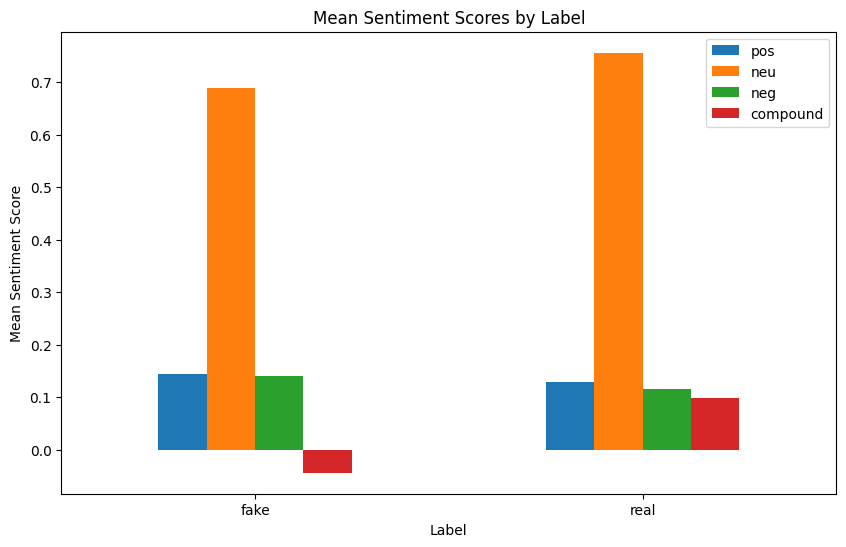

In [37]:
import matplotlib.pyplot as plt


# Plot mean sentiment scores
plt.figure(figsize=(10, 6))
mean_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].mean()
mean_scores.plot(kind='bar', ax=plt.gca())
plt.title('Mean Sentiment Scores by Label')
plt.xlabel('Label')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=0)
plt.show()

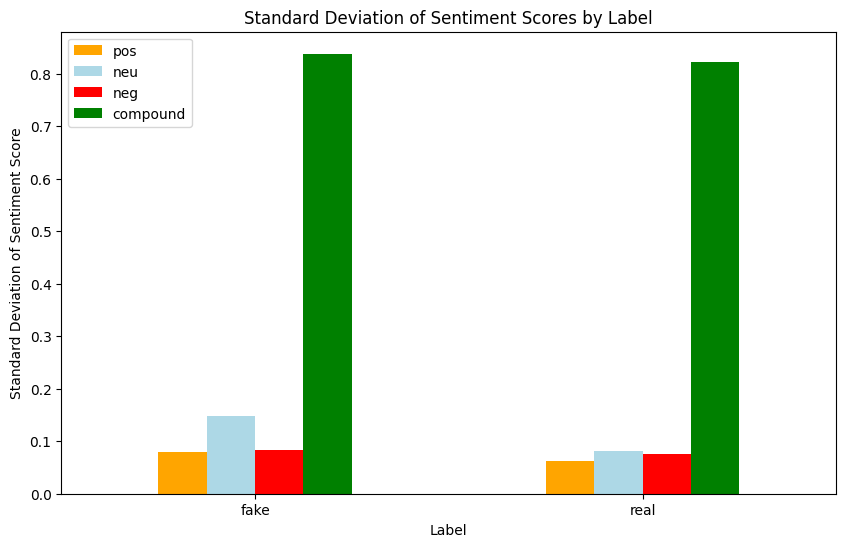

In [38]:
# Plot standard deviation of sentiment scores
plt.figure(figsize=(10, 6))
std_scores = news_data.groupby('label')[['pos', 'neu', 'neg', 'compound']].std()
std_scores.plot(kind='bar', ax=plt.gca(), color=['orange', 'lightblue', 'red', 'green'])
plt.title('Standard Deviation of Sentiment Scores by Label')
plt.xlabel('Label')
plt.ylabel('Standard Deviation of Sentiment Score')
plt.xticks(rotation=0)
plt.show()

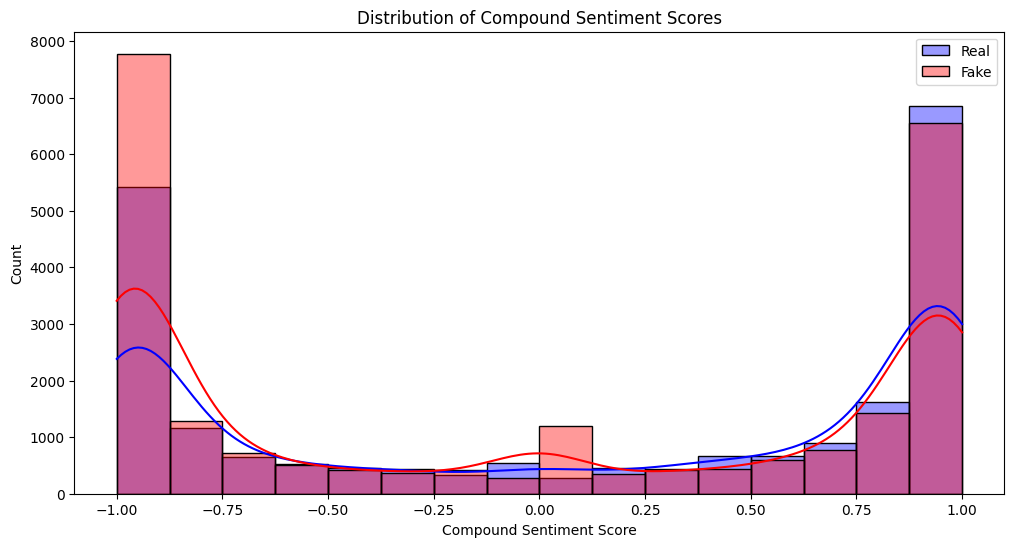

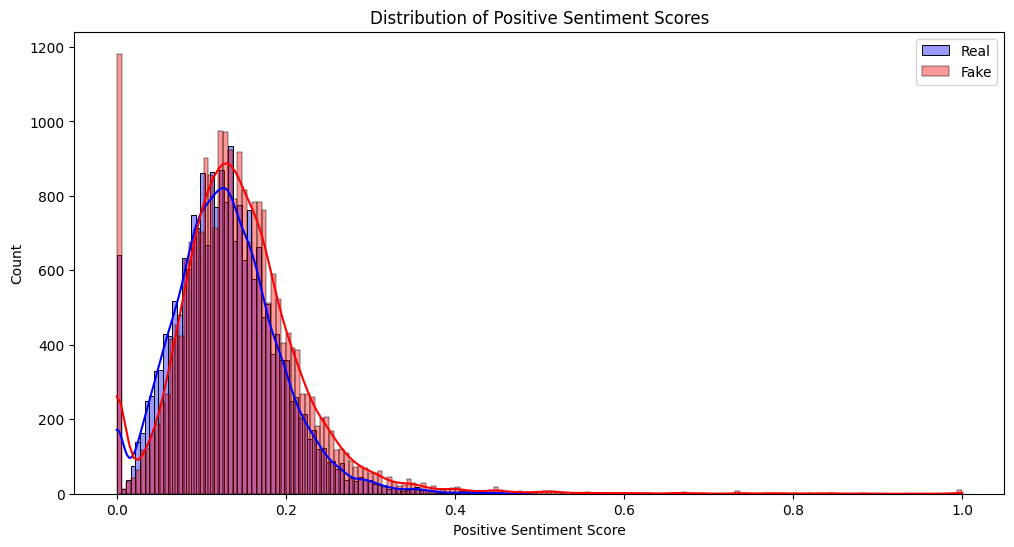

In [39]:
plt.figure(figsize=(12, 6))

# Histogram for compound score
sns.histplot(news_data[news_data['label'] == 'real']['compound'], color='blue', label='Real', kde=True, alpha=0.4)
sns.histplot(news_data[news_data['label'] == 'fake']['compound'], color='red', label='Fake', kde=True, alpha=0.4)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

# Histogram for positive score
sns.histplot(news_data[news_data['label'] == 'real']['pos'], color='blue', label='Real', kde=True, alpha=0.4)
sns.histplot(news_data[news_data['label'] == 'fake']['pos'], color='red', label='Fake', kde=True, alpha=0.4)
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.legend()
plt.show()

In [40]:
from scipy.stats import ttest_ind

# Statistical test
real_compound = news_data[news_data['label'] == 'real']['compound']
fake_compound = news_data[news_data['label'] == 'fake']['compound']
t_stat, p_value = ttest_ind(real_compound, fake_compound)

print(f'T-test for compound score: t-statistic = {t_stat}, p-value = {p_value}')

real_pos = news_data[news_data['label'] == 'real']['pos']
fake_pos = news_data[news_data['label'] == 'fake']['pos']
t_stat, p_value = ttest_ind(real_pos, fake_pos)

print(f'T-test for positive score: t-statistic = {t_stat}, p-value = {p_value}')

T-test for compound score: t-statistic = 18.102074494268777, p-value = 5.584391207832511e-73
T-test for positive score: t-statistic = -21.75015049194517, p-value = 2.3858215729184825e-104


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_data['processed_text']).toarray()
y = news_data['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model: Logistic Regression
Cross-Validated Accuracy: 0.9862743037802384


Test Set Evaluation for Logistic Regression
Accuracy: 0.9866369710467706




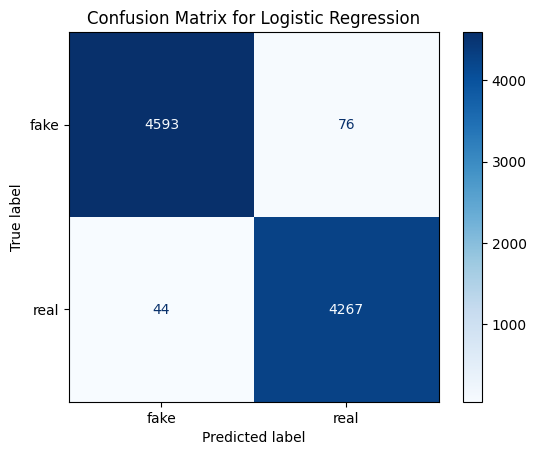



Model: Random Forest
Cross-Validated Accuracy: 0.997132381051896


Test Set Evaluation for Random Forest
Accuracy: 0.9971046770601336




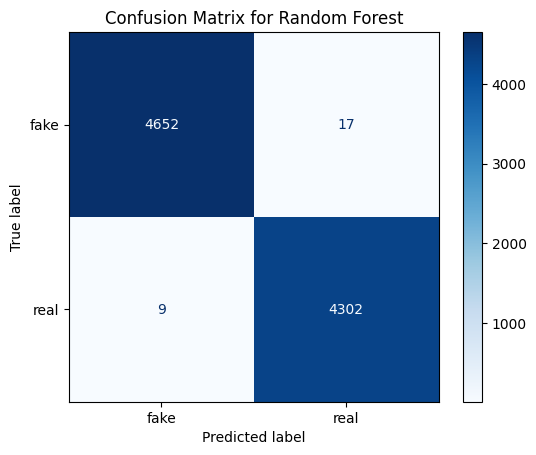



Model: Naive Bayes
Cross-Validated Accuracy: 0.9327636716176247


Test Set Evaluation for Naive Bayes
Accuracy: 0.9292873051224945




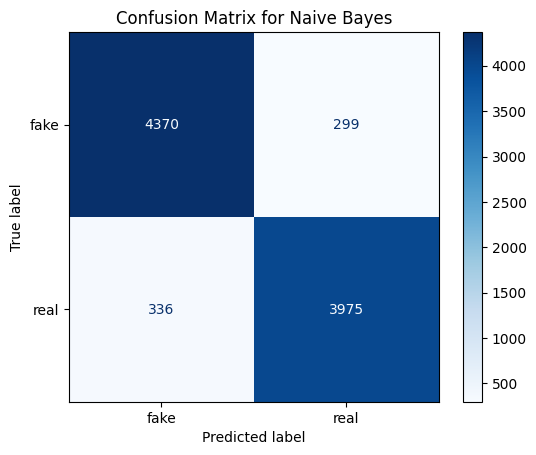

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np



# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Function to perform cross-validation and evaluate model
def evaluate_model_with_cv(model, X_train, y_train, model_name):
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Print cross-validated accuracy
    print(f"Model: {model_name}")
    print(f"Cross-Validated Accuracy: {np.mean(scores)}")
    print("\n")

    # Fit model on the full training data and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate on test set
    accuracy = accuracy_score(y_test, y_pred)

    # Print test set metrics
    print(f"Test Set Evaluation for {model_name}")
    print(f"Accuracy: {accuracy}")
    print("\n")

    # Plot confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

# Evaluate each model with cross-validation and on the test set
for model_name, model in models.items():
    evaluate_model_with_cv(model, X_train, y_train, model_name)